# Libraries Import
Here, we will import essential libraries for data wrangling. Others will be imported later as needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Loading Into Environment

In [2]:
df = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
# Explore the 1st 5 rows of dataset
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
df.describe(include='all')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
count,6.820000e+03,6820,6820,6820,6820,6.820000e+03,6820,6820,6820,6820.00000,6820.000000,6820,6.820000e+03,6820,6820.000000
unique,NaN,2179,57,2759,17,NaN,6731,13,2403,NaN,NaN,2504,NaN,4199,NaN
top,NaN,Universal Pictures,USA,Woody Allen,Comedy,NaN,Pulse,R,1991-10-04,NaN,NaN,Nicolas Cage,NaN,Woody Allen,NaN
freq,NaN,302,4872,33,2080,NaN,3,3392,10,NaN,NaN,42,NaN,32,NaN
mean,2.458113e+07,NaN,NaN,NaN,NaN,3.349783e+07,NaN,NaN,NaN,106.55132,6.374897,NaN,7.121952e+04,NaN,2001.000293
std,3.702254e+07,NaN,NaN,NaN,NaN,5.819760e+07,NaN,NaN,NaN,18.02818,1.003142,NaN,1.305176e+05,NaN,8.944501
min,0.000000e+00,NaN,NaN,NaN,NaN,7.000000e+01,NaN,NaN,NaN,50.00000,1.500000,NaN,2.700000e+01,NaN,1986.000000
25%,0.000000e+00,NaN,NaN,NaN,NaN,1.515839e+06,NaN,NaN,NaN,95.00000,5.800000,NaN,7.665250e+03,NaN,1993.000000
50%,1.100000e+07,NaN,NaN,NaN,NaN,1.213568e+07,NaN,NaN,NaN,102.00000,6.400000,NaN,2.589250e+04,NaN,2001.000000
75%,3.200000e+07,NaN,NaN,NaN,NaN,4.006534e+07,NaN,NaN,NaN,115.00000,7.100000,NaN,7.581225e+04,NaN,2009.000000


# Data Cleaning

In [4]:
# Check the number of Nans
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [5]:
# There are zero Nans or nulls
# According to the dataset description, there are some movies with unknown budgets given as 0, let's count how many of them
df.budget[df.budget==0].count()

2182

There are about 2200 movies with missing budget. Because budget may be a critical variable in estimating gross, we will filter out those movies for now instead of substituting their budget with a statistic. Later, we will get back to those movies, estimate their budgets by other means, and append them back to the original dataframe

In [6]:
# There are about 2200 movies with missing budgets. Let's filter those out into separate dataframe
df_0_budget = df[df.budget==0].reset_index(drop=True)

df = df[df.budget!=0].reset_index(drop=True)


# Check 0 budgets again
df.budget[df.budget==0].count()

0

In [7]:
df.shape

(4638, 15)

In [8]:
# Checking if there are values of different types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 15 columns):
budget      4638 non-null float64
company     4638 non-null object
country     4638 non-null object
director    4638 non-null object
genre       4638 non-null object
gross       4638 non-null float64
name        4638 non-null object
rating      4638 non-null object
released    4638 non-null object
runtime     4638 non-null int64
score       4638 non-null float64
star        4638 non-null object
votes       4638 non-null int64
writer      4638 non-null object
year        4638 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 543.6+ KB


It seems like all the columns are homogenous in data type. 'released' column had type String object, although it seems convertible to datetime object. To make this column ready and useful for future analysis, we'll have to split it into year, month and day columns. We can do this by first converting it to pandas' datetime object and use its attributes to extract year, month, and day

In [9]:
df['released'] = pd.to_datetime(df.released)
for i in range(len(df)):
  df.loc[i, 'release_year'] = df.released[i].year
  df.loc[i, 'release_month'] = df.released[i].month
  df.loc[i, 'release_day'] = df.released[i].day

# Now we can drop 'released' column
df = df.drop('released', axis=1)

# Check head of the dataframe

df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,release_year,release_month,release_day
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986.0,8.0,22.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986.0,6.0,11.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986.0,5.0,16.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986.0,7.0,18.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986.0,8.0,1.0


Also, we can see that 'year' and 'release_year' columns seem identical. They may represent different years like the year when the movie was released vs the year it was made. Let's check if they are identical in order to drop one of them if so. First, let's check the fraction of them that's equal

In [10]:
np.sum(df.year == df.release_year)/len(df)

0.8436826218197498

That is, about 84% of the movies had similar 'release_year' and 'year' values. Now let's see if the ones that aren't equal drastically differ from each other 

In [11]:
df['year_diff'] = np.abs(df.release_year - df.year)
df[df.year !=df.release_year].loc[:, ['name', 'year', 'release_year', 'year_diff']].sort_values('year_diff', ascending=False)\
                                                                                                .head(10)

,name,year,release_year,year_diff
214,The Last Temptation of Christ,1988,2004.0,16.0
576,The Lovers on the Bridge,1991,1999.0,8.0
2571,Eating Out,2004,2012.0,8.0
815,Iron Monkey,1993,2001.0,8.0
685,Twin Dragons,1992,1999.0,7.0
2923,Poultrygeist: Night of the Chicken Dead,2006,2012.0,6.0
1966,The Devil's Backbone,2001,2007.0,6.0
3451,Tanner Hall,2009,2015.0,6.0
896,The Legend of Drunken Master,1994,2000.0,6.0
165,Rampage,1987,1992.0,5.0


That is, there is up to 16 years difference between movies' make year and release year. Since there is significant differences between some movies' release and make years, we will not drop any of their respective columns.


Next, we will check for outliers. We are going to do this by creating histogram for each column. Since budget, gross, and runtime columns are not categorical or bounded by certain range (open ended), their histograms will be selected to detect outliers

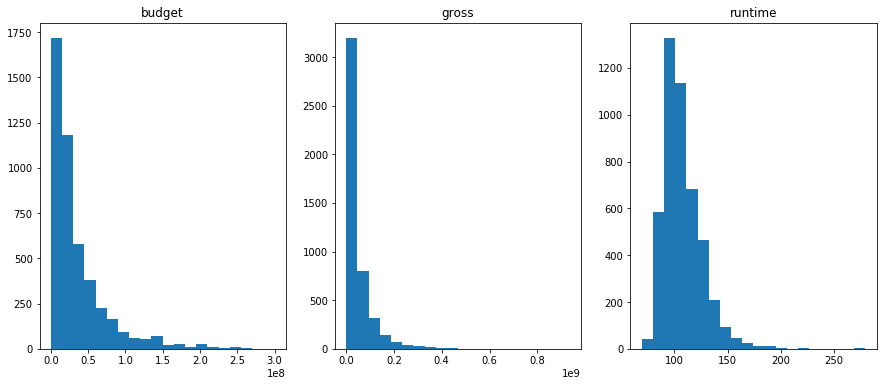

In [12]:
# to check for outliers, we are going to create histograms for each numerical column
bins = len(df)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(df.budget, bins=20)
plt.title('budget')

plt.subplot(1, 3, 2)
plt.hist(df.gross, bins=20)
plt.title('gross')

plt.subplot(1, 3, 3)
plt.hist(df.runtime, bins=20)
plt.title('runtime')


plt.show()

It seems like most movies in the dataset had budgets below 100M, grosses below 200M, and runtimes between 75 to 150 minutes. Movies with extremely high budgets, grosses, and runtimes can be considered as outliers, therefore can be dropped. Although this may reduce the noise in the data, those extreme values, more than often, help drive the decision the most as their characteristics will be decisive in determining success (or failure) of the movie. Therefore, these extreme values will not be dropped for now

In [13]:
df.describe(include='all')

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,release_year,release_month,release_day,year_diff
count,4.638000e+03,4638,4638,4638,4638,4.638000e+03,4638,4638,4638.000000,4638.000000,4638,4.638000e+03,4638,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000
unique,NaN,1340,45,1892,16,NaN,4604,8,NaN,NaN,1613,NaN,2857,NaN,NaN,NaN,NaN,NaN
top,NaN,Universal Pictures,USA,Woody Allen,Comedy,NaN,Bulletproof,R,NaN,NaN,Nicolas Cage,NaN,Woody Allen,NaN,NaN,NaN,NaN,NaN
freq,NaN,265,3726,30,1310,NaN,2,2247,NaN,NaN,38,NaN,29,NaN,NaN,NaN,NaN,NaN
mean,3.614560e+07,NaN,NaN,NaN,NaN,4.607469e+07,NaN,NaN,107.595515,6.356317,NaN,9.570254e+04,NaN,2002.489435,2002.678094,6.645752,16.085166,0.188659
std,3.996947e+07,NaN,NaN,NaN,NaN,6.629378e+07,NaN,NaN,18.022792,1.011063,NaN,1.493878e+05,NaN,8.461472,8.485159,3.469357,8.527333,0.573651
min,6.000000e+03,NaN,NaN,NaN,NaN,3.090000e+02,NaN,NaN,69.000000,1.500000,NaN,1.830000e+02,NaN,1986.000000,1986.000000,1.000000,1.000000,0.000000
25%,1.000000e+07,NaN,NaN,NaN,NaN,6.290905e+06,NaN,NaN,96.000000,5.800000,NaN,1.611050e+04,NaN,1996.000000,1996.000000,4.000000,9.000000,0.000000
50%,2.300000e+07,NaN,NaN,NaN,NaN,2.345551e+07,NaN,NaN,104.000000,6.400000,NaN,4.394000e+04,NaN,2003.000000,2003.000000,7.000000,16.000000,0.000000
75%,4.600000e+07,NaN,NaN,NaN,NaN,5.778243e+07,NaN,NaN,117.000000,7.100000,NaN,1.093932e+05,NaN,2010.000000,2010.000000,10.000000,23.000000,0.000000


We notice that the mean of the budget and its standard deviation have increased since the last time we checked prior to data cleaning. This is because we have dropped movies with missing budget values. We will return those movies into our datasetafter estimating their budgets